In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('Global_VC_Accelerator_Database.csv')

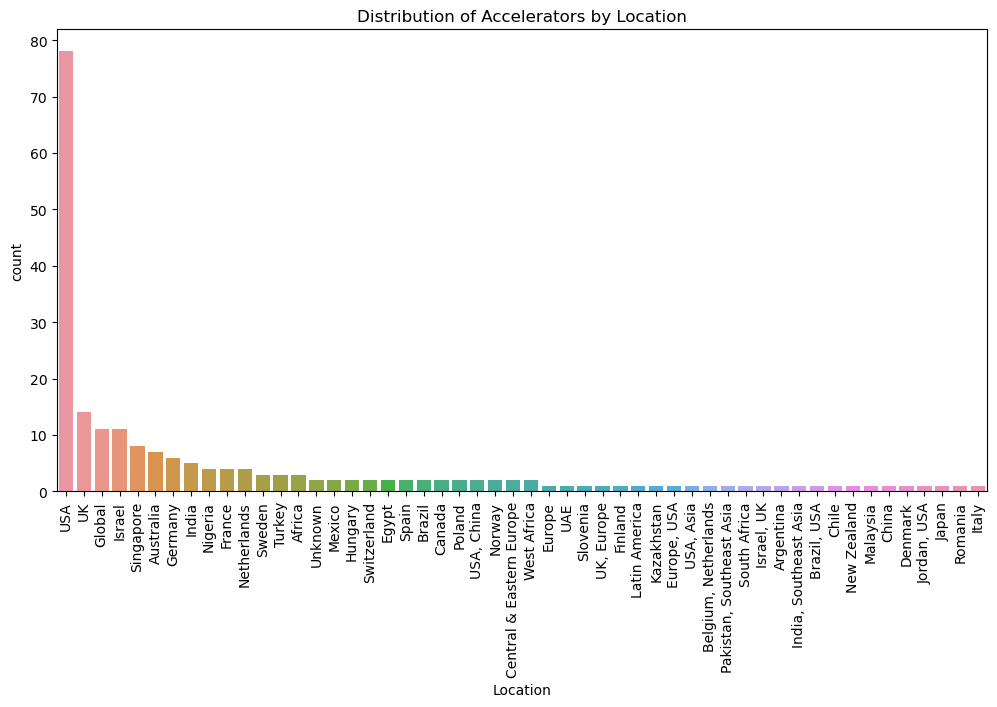

/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


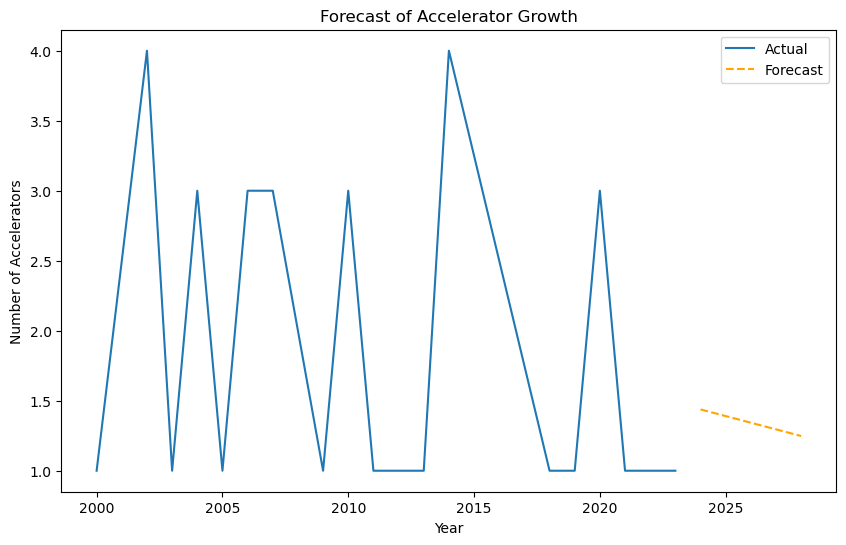

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('Global_VC_Accelerator_Database.csv')

# Data Cleaning: Fill missing values with mode for categorical columns
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Focus Area'].fillna(df['Focus Area'].mode()[0], inplace=True)

# Simple visualization: Distribution of accelerators by location
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Accelerators by Location')
plt.show()

# Simulating year data for the forecast (since we don't have a year column in the dataset)
np.random.seed(42)
df['Year'] = np.random.choice(range(2000, 2024), size=len(df))  # Random year between 2000 and 2023

# Grouping by year and counting the number of accelerators per year
accelerator_counts_by_year = df[df['Type'] == 'Accelerator'].groupby('Year').size()

# Forecasting using Exponential Smoothing
model = ExponentialSmoothing(accelerator_counts_by_year, trend="add", seasonal=None, seasonal_periods=None)
fit = model.fit()

# Forecast the next 5 years
forecast = fit.forecast(steps=5)

# Plot the actual and forecasted values
plt.figure(figsize=(10,6))
plt.plot(accelerator_counts_by_year.index, accelerator_counts_by_year, label='Actual')
plt.plot(range(2024, 2029), forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Forecast of Accelerator Growth')
plt.xlabel('Year')
plt.ylabel('Number of Accelerators')
plt.legend()
plt.show()



In [5]:
# Import necessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual data (accelerator counts) for the last few years before the forecast
actual = accelerator_counts_by_year[-5:]  # Last 5 actual years before forecast

# Forecast values (same time range as the last 5 actual years)
predicted = fit.fittedvalues[-5:]

# Calculate the errors
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Print out the errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.7481862289351262
Mean Squared Error (MSE): 0.6770201824182585
Root Mean Squared Error (RMSE): 0.8228123616100201


Mean Absolute Error (MAE): 0.7481862289351262
Mean Squared Error (MSE): 0.6770201824182585
Root Mean Squared Error (RMSE): 0.8228123616100201


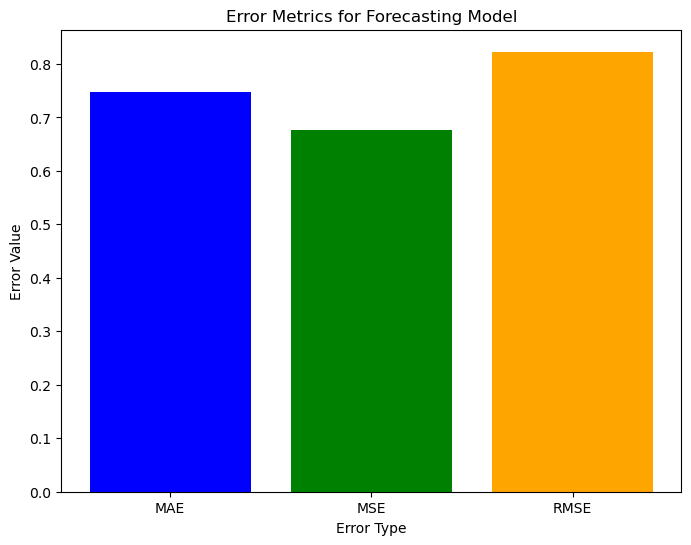

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'actual' and 'predicted' contain your real and forecasted values, calculate the errors
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Print out the errors (optional)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a dictionary with the error values
errors = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
}

# Plot the errors
plt.figure(figsize=(8,6))
plt.bar(errors.keys(), errors.values(), color=['blue', 'green', 'orange'])
plt.title('Error Metrics for Forecasting Model')
plt.ylabel('Error Value')
plt.xlabel('Error Type')
plt.show()


In [6]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(actual, predicted)

# Forecast accuracy as (100 - MAPE)
accuracy = 100 - mape

# Print the accuracy and MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Forecast Accuracy: {accuracy}%")



Mean Absolute Percentage Error (MAPE): 55.88942770032859%
Forecast Accuracy: 44.11057229967141%


/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

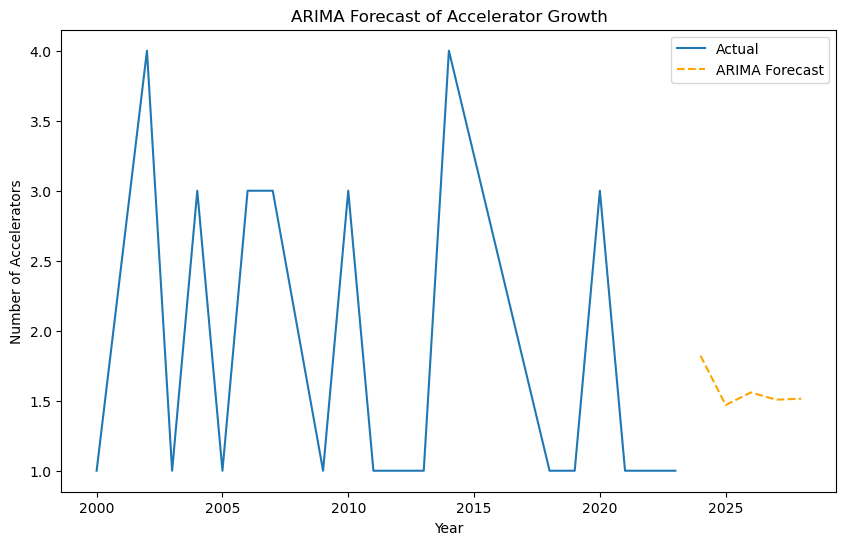

ARIMA Model - Mean Absolute Error (MAE): 0.562625525037115
ARIMA Model - Mean Squared Error (MSE): 0.44579639247608416
ARIMA Model - Root Mean Squared Error (RMSE): 0.6676798577732327
ARIMA Model - Mean Absolute Percentage Error (MAPE): 41.695792914227056%
ARIMA Model - Forecast Accuracy: 58.304207085772944%


In [7]:
# Import ARIMA from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit the ARIMA model on the actual accelerator count data
arima_model = ARIMA(accelerator_counts_by_year, order=(2,1,2))  # Adjust the order if needed
arima_fit = arima_model.fit()

# Forecast the next 5 periods (years)
arima_forecast = arima_fit.forecast(steps=5)

# Plot the actual and ARIMA forecasted values
plt.figure(figsize=(10,6))
plt.plot(accelerator_counts_by_year.index, accelerator_counts_by_year, label='Actual')
plt.plot(range(2024, 2029), arima_forecast, label='ARIMA Forecast', linestyle='--', color='orange')
plt.title('ARIMA Forecast of Accelerator Growth')
plt.xlabel('Year')
plt.ylabel('Number of Accelerators')
plt.legend()
plt.show()

# Evaluate the ARIMA model (similar to before)
# Actual data (accelerator counts) for the last 5 periods
actual_arima = accelerator_counts_by_year[-5:]  # Last 5 actual values

# Predicted values (fitted ARIMA model)
predicted_arima = arima_fit.fittedvalues[-5:]

# Calculate errors: MAE, MSE, RMSE
mae_arima = mean_absolute_error(actual_arima, predicted_arima)
mse_arima = mean_squared_error(actual_arima, predicted_arima)
rmse_arima = np.sqrt(mse_arima)

# MAPE and accuracy
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_arima = mean_absolute_percentage_error(actual_arima, predicted_arima)
accuracy_arima = 100 - mape_arima

# Print the results
print(f"ARIMA Model - Mean Absolute Error (MAE): {mae_arima}")
print(f"ARIMA Model - Mean Squared Error (MSE): {mse_arima}")
print(f"ARIMA Model - Root Mean Squared Error (RMSE): {rmse_arima}")
print(f"ARIMA Model - Mean Absolute Percentage Error (MAPE): {mape_arima}%")
print(f"ARIMA Model - Forecast Accuracy: {accuracy_arima}%")
